# Phase 1: Exploratory Time Series Analysis

Multi-store retail sales forecasting - EDA for seasonality, trend, holiday effects, and stationarity.

In [5]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))  # repo root
import pandas as pd
import matplotlib.pyplot as plt
from src.data_loader import REPO_ROOT, load_and_merge_data, get_aggregated_series, get_store_family_series
from src.eda_utils import (
    trend_decomposition,
    adf_stationarity_test,
    plot_acf_pacf,
    analyze_holiday_effects,
    analyze_seasonality,
    plot_decomposition,
)

## 1. Load Data

In [6]:
data_dir = REPO_ROOT / "data" / "store-sales-time-series-forecasting"
df = load_and_merge_data(data_dir)
print(f"Shape: {df.shape}")
print(df.head())
print(df.info())
print(df.isnull().sum())

Shape: (3000888, 13)
   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  oil_price  is_holiday  transactions  
0    D       13        NaN        True           NaN  
1    D       13        NaN        True           NaN  
2    D       13        NaN        True           NaN  
3    D       13        NaN        True           NaN  
4    D       13        NaN        True           NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------    

## 2. Aggregate Sales & Basic Stats

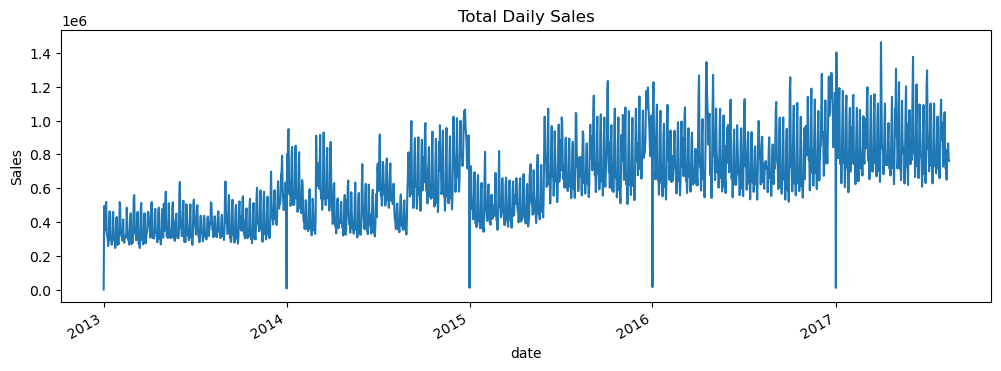

In [7]:
daily_sales = get_aggregated_series(df)
daily_sales.plot(figsize=(12, 4), title='Total Daily Sales')
plt.ylabel('Sales')
plt.show()

## 3. Trend Decomposition

/var/folders/fl/bvl2r1cj393d3t4h298rxgjm0000gn/T/ipykernel_19614/861495693.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


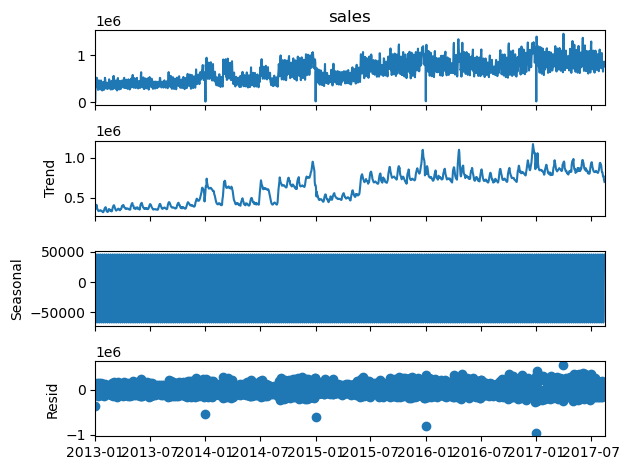

In [8]:
components, decomp = trend_decomposition(daily_sales, period=7)
plot_decomposition(decomp)
plt.tight_layout()
plt.show()

## 4. Seasonality: Weekly and Monthly

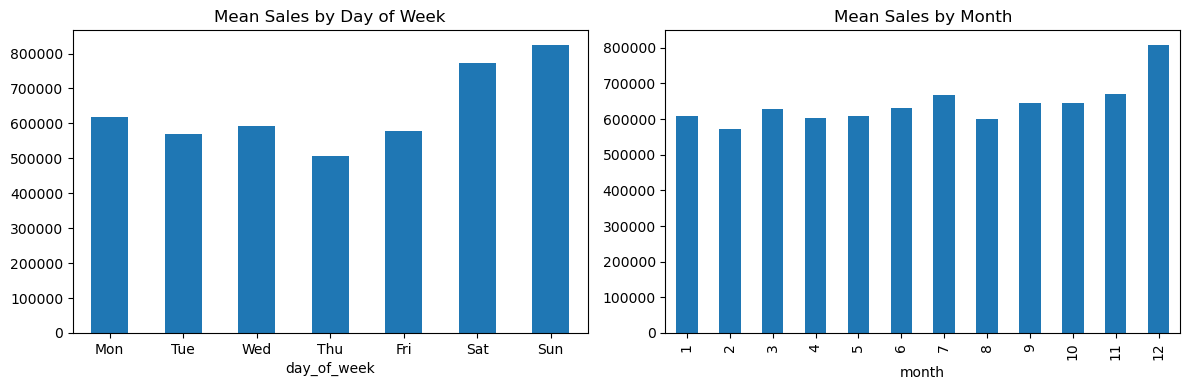

In [9]:
weekly, monthly = analyze_seasonality(df)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
weekly.plot(kind='bar', ax=axes[0], title='Mean Sales by Day of Week')
axes[0].set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
monthly.plot(kind='bar', ax=axes[1], title='Mean Sales by Month')
plt.tight_layout()
plt.show()

## 5. Holiday Effects

In [10]:
holiday_stats = analyze_holiday_effects(df)
print(holiday_stats)

                     mean            std  count
is_holiday                                     
False       628343.361801  227107.971902   1539
True        735341.506148  284234.301178    145


## 6. Stationarity (ADF Test)

In [11]:
adf_result = adf_stationarity_test(daily_sales)
for k, v in adf_result.items():
    print(f"{k}: {v}")

adf_statistic: -2.616195748604857
p_value: 0.08969592175787466
is_stationary: False
interpretation: Non-stationary (fail to reject H0)


## 7. ACF / PACF

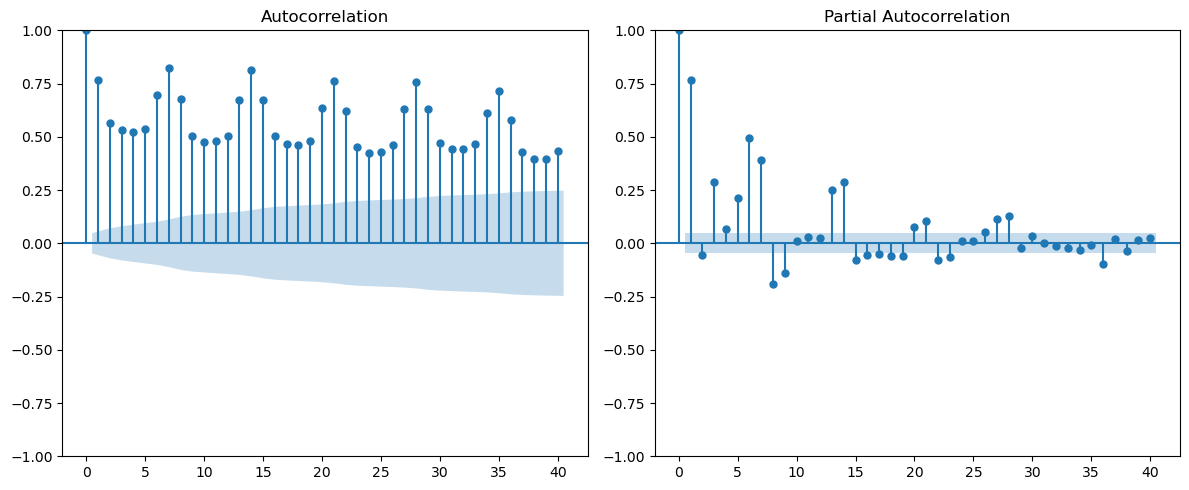

In [12]:
plot_acf_pacf(daily_sales, lags=40)
plt.show()